In [1]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')

## Review

In [2]:
united = Table.read_table('united.csv')

In [3]:
united.sample(6,with_replacement = False).show()

Date,Flight Number,Destination,Delay
6/1/15,1922,EWR,-1
8/19/15,267,PHL,-4
8/7/15,1200,IAH,2
6/6/15,364,PDX,17
6/4/15,1111,EWR,-1
7/26/15,1957,MCO,17


In [4]:
population_mean = np.average(united.column("Delay"))
population_mean

16.658155515370705

In [5]:
population_sd = np.std(united.column("Delay"))
population_sd

39.480199851609314

In [6]:
def one_sample_mean(sample_size):
    """Take a sample from the population of flights and compute its mean"""
    sampled_flights = united.sample(sample_size)
    return np.mean(sampled_flights.column('Delay'))

In [7]:
def ten_thousand_sample_means(sample_size):
    """Approximate the distribution of the sample mean"""
    means = make_array()
    for i in np.arange(10000):
        mean = one_sample_mean(sample_size)
        means = np.append(means, mean)
    return means

In [8]:
sample_means_400 = ten_thousand_sample_means(400)
sample_means_900 = ten_thousand_sample_means(900)

In [10]:
means_tbl = Table().with_columns(
    '400', sample_means_400,
    '900', sample_means_900,
)
means_tbl

400,900
20.32,15.2933
23.0975,18.24
16.7275,15.3522
15.5125,16.4311
15.3825,16.69
17.215,17.7356
15.815,16.6567
16.025,14.6433
15.3925,15.9011
16.6225,19.1156


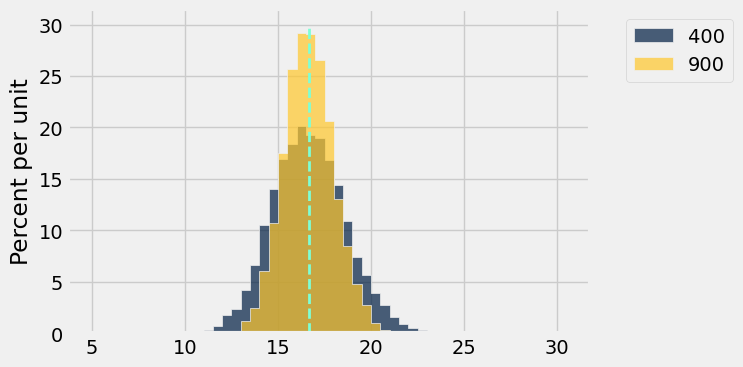

In [11]:
means_tbl.hist(bins = np.arange(5, 31, 0.5))
plots.plot((population_mean, population_mean), (0, 0.3), color='aquamarine', lw=2,ls='--')
plots.show();

## New material

### Choosing a sample size given an interval width

In [12]:
# population of size 10

number_of_ones = 2
zero_one_population = np.append(np.ones(number_of_ones), np.zeros(10 - number_of_ones))

print('Standard Deviation:', np.round(np.std(zero_one_population),2))

zero_one_population

Standard Deviation: 0.4


array([ 1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [13]:
def sd_of_zero_one_population(number_of_ones):
    """Returns the SD of a population 
    that has 10 elements: num_ones with value 1 and (10 - num_ones) with value 0"""
    zero_one_population = np.append(np.ones(number_of_ones), 
                                    np.zeros(10 - number_of_ones))
    return np.std(zero_one_population)

In [14]:
possible_ones = np.arange(11)
zero_one_pop = Table().with_columns(
    'Number of Ones', possible_ones,
    'Proportion of Ones', possible_ones / 10
)
zero_one_pop.show()

Number of Ones,Proportion of Ones
0,0
1,0.1
2,0.2
3,0.3
4,0.4
5,0.5
6,0.6
7,0.7
8,0.8
9,0.9


In [15]:
sds = zero_one_pop.apply(sd_of_zero_one_population, 'Number of Ones')
zero_one_pop = zero_one_pop.with_column('Pop SD', sds)
zero_one_pop.show()

Number of Ones,Proportion of Ones,Pop SD
0,0,0
1,0.1,0.3
2,0.2,0.4
3,0.3,0.458258
4,0.4,0.489898
5,0.5,0.5
6,0.6,0.489898
7,0.7,0.458258
8,0.8,0.4
9,0.9,0.3


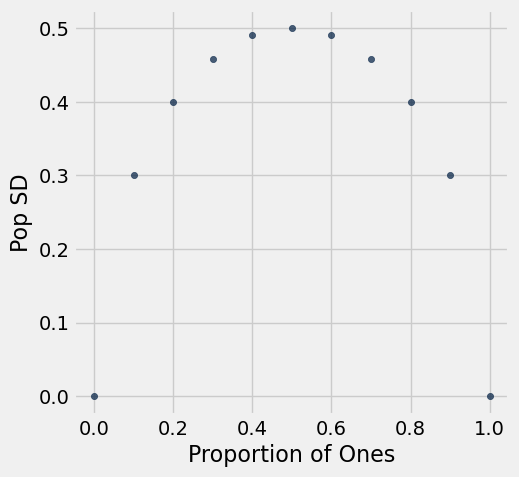

In [18]:
zero_one_pop.scatter('Proportion of Ones', 'Pop SD')
plots.show()

In [4]:
import numpy as np
(np.sqrt(1004)*0.06/4)

np.float64(0.47528938553264577)

In [5]:
(0.5*4/0.06)**2

1111.1111111111113

In [6]:
4*0.5/np.sqrt(1000)

np.float64(0.06324555320336758)